# 원핫 인코딩 진행해서 모델링 다시 진행하기

## 1. 실제 범주형 피쳐만 추출하고 원핫 인코딩 진행
## 2. 훈련데이터 : 테스트 데이터 = 7 : 3 으로 split
## 3. 훈련 데이터 내에서 훈련 : 검증 = 7:3으로 split
## 4. kfold 진행 시 훈련 , 검증으로만 진행
## 5. 가장 적합한 kfold 데이터셋 추출
## 6. 해당 데이터셋으로 훈련 데이터 추출
## 7. 하이퍼파라미터 튜닝 + GridSearchCV
## 8. 모델링 및 test data를 통해 성능 검증
## 9. feature_importance_ 에 대해서 시각화 진행
## 10. 완성된 모델로 동일하게 2016, 2017, 2018 데이터에 진행하여 feature_importance_ 확인
## 11 . 시각화를 통해 트렌드 변화 표현

In [122]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt


# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")

else :

    plt.rc("font", family="Malgun Gothic")

In [95]:
# 연도 구분 -> 나중에


# 범주형 데이터 -> 원핫 인코딩 진행
'본분교',
'국공사립',
'학위과정유형',
'주야간',
'전공계열',
'전공_소분류_코드',
'전공_세분류_코드',
'학교유형',
'학교소재지역',
'성별',
'혼인여부 및 배우자 학력',
'아버지 학력',
'어머니 학력',
'부모님 소득',
'부모님 자산',
'대학 입학 구분',
'석사/박사 재학여부',
'목표 직업',
'목표 직업 유형',
'근로소득',
'근로시간',
'적성 및 흥미',
'전공 관련성',
'업무 난이도',
'업무량',
'개인 발전 가능성',
'직업 미래 전망',
'고용 안정성',
'근무환경',
'복리후생',
'회사 규모',
'출퇴근 거리',
'일자리의 사회적 평판',
'업무의 사회적 평판',
'거절 이유',
'구직 과정 어려운 점',
'인턴경험여부(현직장)',
'구직경로',
'구직방법',
'취업_중요요소_1순위',
'취업_중요요소_2순위',
'건강한정도',
'흡연여부',
'재학중 일자리 경험',
'고용형태',
'토스등급',
'오픽점수',
'탭스'


# 수치형 데이터
'연령',
'가정의 경제적 지원',
'진로 선택 및 취업준비 프로그램 참여 횟수',
'GPA',
'학자금대출 금액',
'휴학 횟수',
'희망연봉',
'구직기간',
'일자리 지원 횟수',
'면접 횟수',
'합격 제의 횟수',
'구직기간(주)',
'운동시간(주)',
'수면시간(일)',
'음주빈도',
'일자리 횟수',
'교육훈련횟수',
'시간총합',
'연수횟수',
'토익',
'토플ibt',
'체류시간'

# 나중에 활용할 데이터
'연도'

# 타겟값 
'취업여부'

'취업여부'

In [151]:
df = pd.read_csv('../datasets/GP_통합(3years)_ver4_취업예측용.csv')
df.head()

,연도,본분교,국공사립,학위과정유형,주야간,전공계열,전공_소분류_코드,전공_세분류_코드,학교유형,학교소재지역,...,연수횟수,토익,토스등급,오픽점수,토플ibt,탭스,체류시간,취업여부,기업 구분,종사상 지위
0,2018,1,3,3,2,1,0,7,1,1,...,0,0,0,0,0,0,0,1,5,2
1,2018,1,3,3,1,1,0,4,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2018,1,3,3,1,1,0,4,1,1,...,0,800,0,0,0,0,0,1,8,5
3,2018,1,3,3,1,1,0,2,1,8,...,1,0,0,0,0,0,12,1,1,1
4,2018,1,3,3,1,1,0,2,1,8,...,0,0,0,0,0,0,0,1,1,1


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51690 entries, 0 to 51689
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   연도                       51690 non-null  int64  
 1   본분교                      51690 non-null  int64  
 2   국공사립                     51690 non-null  int64  
 3   학위과정유형                   51690 non-null  int64  
 4   주야간                      51690 non-null  int64  
 5   전공계열                     51690 non-null  int64  
 6   전공_소분류_코드                51690 non-null  int64  
 7   전공_세분류_코드                51690 non-null  int64  
 8   학교유형                     51690 non-null  int64  
 9   학교소재지역                   51690 non-null  int64  
 10  성별                       51690 non-null  int64  
 11  연령                       51690 non-null  int64  
 12  혼인여부 및 배우자 학력            51690 non-null  int64  
 13  아버지 학력                   51690 non-null  int64  
 14  어머니 학력                

## 1. 실제 범주형 피쳐만 추출하고 원핫 인코딩 진행

In [153]:
object_column = ['본분교',
'국공사립',
'학위과정유형',
'주야간',
'전공계열',
'전공_소분류_코드',

'학교유형',
'학교소재지역',
'성별',
'혼인여부 및 배우자 학력',
'아버지 학력',
'어머니 학력',
'부모님 소득',
'부모님 자산',
'대학 입학 구분',
'석사/박사 재학여부',
'목표 직업',
'목표 직업 유형',
'근로소득',
'근로시간',
'적성 및 흥미',
'전공 관련성',
'업무 난이도',
'업무량',
'개인 발전 가능성',
'직업 미래 전망',
'고용 안정성',
'근무환경',
'복리후생',
'회사 규모',
'출퇴근 거리',
'일자리의 사회적 평판',
'업무의 사회적 평판',
'거절 이유',
'구직 과정 어려운 점',
'인턴경험여부(현직장)',
'구직경로',
'구직방법',
'취업_중요요소_1순위',
'취업_중요요소_2순위',
'건강한정도',
'흡연여부',
'재학중 일자리 경험',
'고용형태',
'토스등급',
'오픽점수',
'탭스'
]

In [154]:


for i in object_column:
    df = df.astype({i:'object'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51690 entries, 0 to 51689
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   연도                       51690 non-null  int64  
 1   본분교                      51690 non-null  object 
 2   국공사립                     51690 non-null  object 
 3   학위과정유형                   51690 non-null  object 
 4   주야간                      51690 non-null  object 
 5   전공계열                     51690 non-null  object 
 6   전공_소분류_코드                51690 non-null  object 
 7   전공_세분류_코드                51690 non-null  int64  
 8   학교유형                     51690 non-null  object 
 9   학교소재지역                   51690 non-null  object 
 10  성별                       51690 non-null  object 
 11  연령                       51690 non-null  int64  
 12  혼인여부 및 배우자 학력            51690 non-null  object 
 13  아버지 학력                   51690 non-null  object 
 14  어머니 학력                

In [155]:
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51690 entries, 0 to 51689
Columns: 562 entries, 연도 to 탭스_10
dtypes: float64(1), int64(26), uint8(535)
memory usage: 37.0 MB


In [156]:
df.drop(columns='전공_세분류_코드' , inplace=True)

In [157]:
df.columns

Index(['연도', '연령', '가정의 경제적 지원', '진로 선택 및 취업준비 프로그램 참여 횟수', 'GPA', '학자금대출 금액',
       '휴학 횟수', '희망연봉', '구직기간', '일자리 지원 횟수',
       ...
       '탭스_1', '탭스_2', '탭스_3', '탭스_4', '탭스_5', '탭스_6', '탭스_7', '탭스_8', '탭스_9',
       '탭스_10'],
      dtype='object', length=561)

In [158]:
df.to_csv('GP_통합(3years)_ver5_원핫_취업예측용.csv' , encoding='utf-8-sig' , index=False)

In [104]:
year = df['연도']

df.drop(columns=['연도'] , inplace=True)

## 2. 훈련데이터 : 테스트 데이터 = 7 : 3 으로 split

In [105]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 연도 변수 따로 저장 후 삭제

y = df['취업여부']
X = df.drop(columns=['취업여부'])

X_train_basic , X_test , y_train_basic, y_test = train_test_split(X, y , test_size=0.3 , random_state=0 , stratify=y)

smote = SMOTE(random_state=0)
X_train , y_train = smote.fit_resample(X_train_basic, y_train_basic)




- 훈련세트 : X_train , y_train
- 테스트 세트 : X_test, y_test

## 3. 훈련 데이터 내에서 훈련 : 검증 = 7:3으로 split -> kfold로 진행

In [55]:
# print(X_train.shape)
# print(y_train.shape)

# X_train2 , X_val , y_train2, y_val = train_test_split(X_train, y_train , test_size=0.3 , random_state=0)

(55568, 557)
(55568,)


In [56]:
# print(X_train2.shape)
# print(y_train2.shape)

(38897, 557)
(38897,)


- 훈련 세트 : X_train2 , y_train2 
- 검증 세트 : X_val , y_val
- 최종 훈련 세트 : X_train , y_train
- 테스트 세트 : X_test , y_test

In [47]:
# 모델링 진행되는지 미리 확인

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, confusion_matrix,classification_report


# rf = RandomForestClassifier(random_state=0 , max_depth=1 , n_estimators=1000)

# # 학습
# rf.fit(X_train2, y_train2)

# # 평가
# pred = rf.predict(X_val)

# acc = accuracy_score(y_val, pred)
# recall = recall_score(y_val, pred)
# precision = precision_score(y_val, pred)
# f1 = f1_score(y_val , pred)
# roc = roc_auc_score(y_val, pred)

# print('정확도:',rf.__class__.__name__ ,  acc)
# print('재현율:',rf.__class__.__name__ ,  recall)
# print('정밀도:',rf.__class__.__name__ ,  precision)
# print('F1:',rf.__class__.__name__ ,  f1)
# print('roc_auc_score:',rf.__class__.__name__ ,  roc)

정확도: RandomForestClassifier 0.999940015595945
재현율: RandomForestClassifier 0.9998789639312515
정밀도: RandomForestClassifier 1.0
F1: RandomForestClassifier 0.9999394783029716
roc_auc_score: RandomForestClassifier 0.9999394819656258


## 3. kfold 진행 시 훈련 , 검증으로만 진행

In [86]:
# print(X_train_basic.shape)
# print(y_train_basic.shape)
# print(X_test.shape)
# print(y_test.shape)

(36183, 557)
(36183,)
(15507, 557)
(15507,)


In [91]:
# cv_acc = []

# # # DecisionTreeClassifier 객체 생성 
# from sklearn.model_selection import KFold

# rt_clf = RandomForestClassifier(random_state=0)

# # # 3개의 폴드 세트로 분리하는 KFold 객체 생성
# kfold = KFold(n_splits=5 , shuffle=True)

# # # 폴드 세트별 정확도를 담을 리스트 객체 생성
# import numpy as np

# for i , (train_index , val_index) in enumerate(kfold.split(X_train_basic.values)):
#     X_train = X_train_basic.iloc[train_index]
#     y_train = y_train_basic.iloc[train_index]
#     X_test = X_train_basic.iloc[val_index]
#     y_test = y_train_basic.iloc[val_index]
    
#     rf_clf.fit(X_train , y_train)
#     pred = rf_clf.predict(X_test)
#     acc = np.round(accuracy_score(y_test , pred),3)
# # #     print(acc)

#     train_size = X_train.shape[0]
#     test_size = X_test.shape[0]
#     print(i)
#     print(f'정확도 : {acc} , 학습데이터 크기 : {train_size} , 검증데이터 크기 : {test_size}')
#     cv_acc.append(acc)
    

# print('평균 정확도' , np.mean(cv_acc))

0
정확도 : 1.0 , 학습데이터 크기 : 28946 , 검증데이터 크기 : 7237
1
정확도 : 1.0 , 학습데이터 크기 : 28946 , 검증데이터 크기 : 7237
2
정확도 : 1.0 , 학습데이터 크기 : 28946 , 검증데이터 크기 : 7237
3
정확도 : 1.0 , 학습데이터 크기 : 28947 , 검증데이터 크기 : 7236
4
정확도 : 1.0 , 학습데이터 크기 : 28947 , 검증데이터 크기 : 7236
평균 정확도 1.0


In [93]:
# # stratified 교차검증

# from sklearn.model_selection import StratifiedKFold

# import numpy as np



st_kfold = StratifiedKFold(n_splits=5)


cv_acc = []

n = 1
for train_idx , val_idx in st_kfold.split(X_train_basic , y_train_basic):
    
    X_train = X_train_basic.iloc[train_idx]
    X_test = X_train_basic.iloc[test_idx]
    y_train = y_train_basic.iloc[train_idx]
    y_test = y_train_basic.iloc[test_idx]
    
    rf_clf.fit(X_train , y_train)
    pred = rf_clf.predict(X_test)
    acc = np.round(accuracy_score(y_test , pred),3)
    
    print(f'[교차검증 : {n}회]')
    print(f'{n}회 교차검증의 정확도 : {acc} \n')
    
    n+=1
    
    cv_acc.append(acc)


print('평균 정확도' , np.round( np.mean(cv_acc),2))

[교차검증 : 1회]
1회 교차검증의 정확도 : 1.0 

[교차검증 : 2회]
2회 교차검증의 정확도 : 1.0 

[교차검증 : 3회]
3회 교차검증의 정확도 : 1.0 

[교차검증 : 4회]
4회 교차검증의 정확도 : 1.0 

[교차검증 : 5회]
5회 교차검증의 정확도 : 1.0 

평균 정확도 1.0


In [125]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=0)

rf_clf = RandomForestClassifier(random_state=0)

params = {'max_depth' : [1,2,3,4,5] , 'n_estimators':[10, 100, 200, 300 , 400]}


In [126]:
grid_search = GridSearchCV(rf_clf , param_grid=params , cv= stratified_kfold , refit=True , return_train_score=True ,
                          scoring='roc_auc' , n_jobs=-1)

grid_search.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.431716,0.126881,0.213651,0.095108,1,10,"{'max_depth': 1, 'n_estimators': 10}",0.878687,0.888300,0.883891,...,0.882943,3.157085e-03,25,0.884016,0.881612,0.882728,0.883250,0.883188,0.882959,7.903150e-04
1,4.269752,0.498991,0.270660,0.035298,1,100,"{'max_depth': 1, 'n_estimators': 100}",1.000000,1.000000,1.000000,...,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.965068e-17
2,7.525481,1.048572,0.439098,0.100175,1,200,"{'max_depth': 1, 'n_estimators': 200}",1.000000,1.000000,1.000000,...,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,9.895411,0.619927,0.501115,0.024729,1,300,"{'max_depth': 1, 'n_estimators': 300}",1.000000,1.000000,1.000000,...,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,13.054874,1.667490,0.595951,0.071373,1,400,"{'max_depth': 1, 'n_estimators': 400}",1.000000,1.000000,1.000000,...,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,1.407914,0.234395,0.197045,0.048150,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.998370,0.999945,0.998578,...,0.999062,7.277191e-04,24,0.998414,0.999928,0.998361,0.999925,0.998449,0.999015,7.445489e-04
6,6.033201,0.689167,0.314869,0.066256,2,100,"{'max_depth': 2, 'n_estimators': 100}",1.000000,1.000000,1.000000,...,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
7,9.501318,0.752073,0.380699,0.046111,2,200,"{'max_depth': 2, 'n_estimators': 200}",1.000000,1.000000,1.000000,...,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,14.047229,0.573829,0.534721,0.099242,2,300,"{'max_depth': 2, 'n_estimators': 300}",1.000000,1.000000,1.000000,...,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,17.836118,0.500415,0.580530,0.072639,2,400,"{'max_depth': 2, 'n_estimators': 400}",1.000000,1.000000,1.000000,...,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [127]:
grid_search.best_params_

{'max_depth': 1, 'n_estimators': 100}

In [128]:
cv_score = grid_search.best_score_
cv_score

1.0

In [129]:
test_score = grid_search.score(X_test, y_test)
test_score

1.0

In [130]:


rf_best = grid_search.best_estimator_

pred =rf_best.predict(X_test)

acc = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
f1 = f1_score(y_test , pred)
roc = roc_auc_score(y_test, pred)

print('정확도:',rf_best.__class__.__name__ ,  acc)
print('재현율:',rf_best.__class__.__name__ ,  recall)
print('정밀도:',rf_best.__class__.__name__ ,  precision)
print('F1:',rf_best.__class__.__name__ ,  f1)
print('roc_auc_score:',rf_best.__class__.__name__ ,  roc)

정확도: RandomForestClassifier 0.9997420519765268
재현율: RandomForestClassifier 0.9996640631561267
정밀도: RandomForestClassifier 1.0
F1: RandomForestClassifier 0.9998320033599328
roc_auc_score: RandomForestClassifier 0.9998320315780633


In [131]:
# 중요도 높은 20개 피처를 seaborn barplot을 이용하여 그리기
def plot_importances(estimator, top=20):
    ftr_importances_values = estimator.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

    ftr_top20 = ftr_importances.sort_values(ascending=False)[:top]
    plt.figure(figsize=(16,10))
    plt.title('Feature importances Top 20')
    sns.barplot(x=ftr_top20, y = ftr_top20.index)
    plt.show()

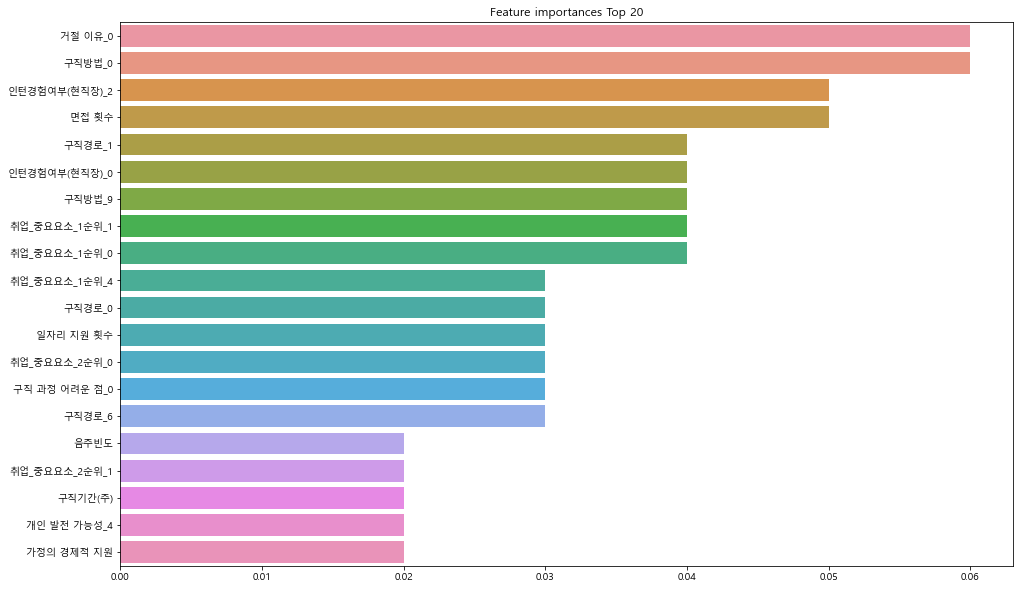

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_importances(rf_best)

## Decision Tree로 진행

In [133]:
from sklearn.tree import DecisionTreeClassifier


params = {'max_depth' : [1,2,3,4,5] , 'min_samples_split':[2,3,4]}
df_clf = DecisionTreeClassifier(random_state=0)




In [134]:
grid_search = GridSearchCV(df_clf , param_grid=params , cv= stratified_kfold , refit=True , return_train_score=True ,
                          scoring='roc_auc' , n_jobs=-1)

In [135]:
grid_search.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.460925,0.092684,0.214451,0.094418,1,2,"{'max_depth': 1, 'min_samples_split': 2}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.433119,0.027028,0.179039,0.036760,1,3,"{'max_depth': 1, 'min_samples_split': 3}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.596755,0.025514,0.363487,0.028682,1,4,"{'max_depth': 1, 'min_samples_split': 4}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.663589,0.070349,0.190372,0.084849,2,2,"{'max_depth': 2, 'min_samples_split': 2}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.800833,0.116544,0.210220,0.054536,2,3,"{'max_depth': 2, 'min_samples_split': 3}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.852746,0.053811,0.282262,0.048999,2,4,"{'max_depth': 2, 'min_samples_split': 4}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,1.808968,0.147713,0.198647,0.079018,3,2,"{'max_depth': 3, 'min_samples_split': 2}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,1.619096,0.031828,0.172840,0.023659,3,3,"{'max_depth': 3, 'min_samples_split': 3}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,1.605385,0.041615,0.210846,0.027660,3,4,"{'max_depth': 3, 'min_samples_split': 4}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,1.638968,0.134875,0.208646,0.049735,4,2,"{'max_depth': 4, 'min_samples_split': 2}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [136]:
grid_search.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [137]:
cv_score = grid_search.best_score_
cv_score

1.0

In [138]:
test_score = grid_search.score(X_test, y_test)
test_score

1.0

In [139]:

df_best = grid_search.best_estimator_

pred =df_best.predict(X_test)

acc = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
f1 = f1_score(y_test , pred)
roc = roc_auc_score(y_test, pred)

print('정확도:',df_best.__class__.__name__ ,  acc)
print('재현율:',df_best.__class__.__name__ ,  recall)
print('정밀도:',df_best.__class__.__name__ ,  precision)
print('F1:',df_best.__class__.__name__ ,  f1)
print('roc_auc_score:',df_best.__class__.__name__ ,  roc)

정확도: DecisionTreeClassifier 1.0
재현율: DecisionTreeClassifier 1.0
정밀도: DecisionTreeClassifier 1.0
F1: DecisionTreeClassifier 1.0
roc_auc_score: DecisionTreeClassifier 1.0


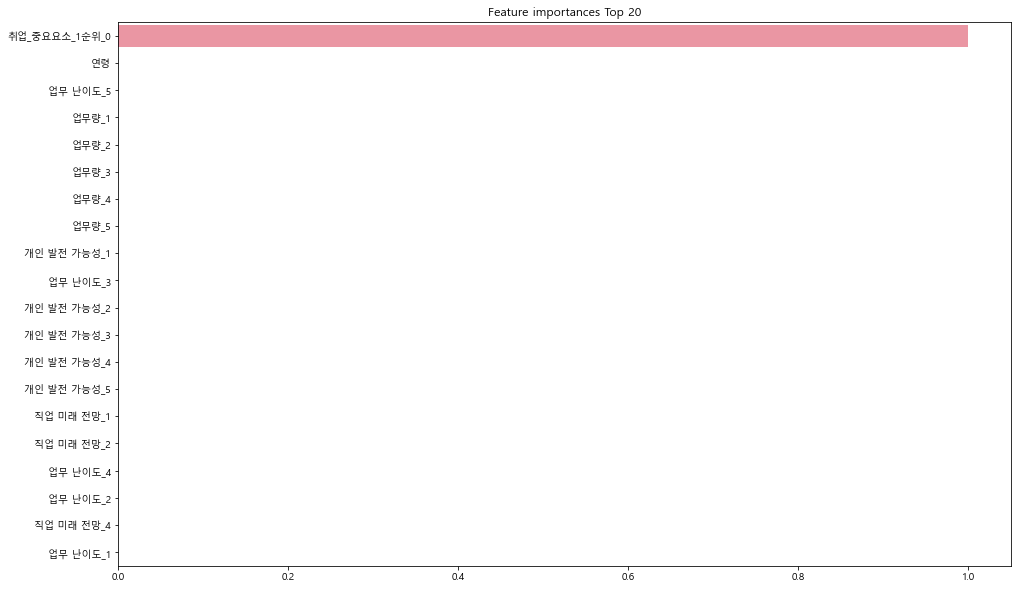

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_importances(df_best)

In [143]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)

params = {'max_depth' : [1,2,3,4,5] , 'n_estimators':[10, 100, 200, 300 , 400]}

params={
                 'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5]}

                 




In [144]:
grid_search = GridSearchCV(xgb , param_grid=params , cv= stratified_kfold , refit=True , return_train_score=True ,
                          scoring='roc_auc' , n_jobs=-1)

In [145]:
grid_search.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df

[01:06:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,36.373862,0.959340,0.242054,0.079336,5,1,"{'max_depth': 5, 'min_child_weight': 1}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,35.154989,0.689555,0.205845,0.024658,5,3,"{'max_depth': 5, 'min_child_weight': 3}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,35.356034,1.274582,0.257057,0.122156,5,5,"{'max_depth': 5, 'min_child_weight': 5}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,36.782618,1.059928,2.063265,3.734010,6,1,"{'max_depth': 6, 'min_child_weight': 1}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,34.862991,0.523212,0.168237,0.052054,6,3,"{'max_depth': 6, 'min_child_weight': 3}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,34.206842,0.607445,0.198647,0.032728,6,5,"{'max_depth': 6, 'min_child_weight': 5}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,29.657426,4.343972,1.539947,2.817579,8,1,"{'max_depth': 8, 'min_child_weight': 1}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,28.049265,1.725812,0.108224,0.059446,8,3,"{'max_depth': 8, 'min_child_weight': 3}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,26.065824,1.808606,0.113627,0.017831,8,5,"{'max_depth': 8, 'min_child_weight': 5}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [146]:
grid_search.best_params_

{'max_depth': 5, 'min_child_weight': 1}

In [147]:
cv_score = grid_search.best_score_
cv_score

1.0

In [148]:
test_score = grid_search.score(X_test, y_test)
test_score

1.0

In [149]:
xgb_best = grid_search.best_estimator_

pred =xgb_best.predict(X_test)

acc = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
f1 = f1_score(y_test , pred)
roc = roc_auc_score(y_test, pred)

print('정확도:',xgb_best.__class__.__name__ ,  acc)
print('재현율:',xgb_best.__class__.__name__ ,  recall)
print('정밀도:',xgb_best.__class__.__name__ ,  precision)
print('F1:',xgb_best.__class__.__name__ ,  f1)
print('roc_auc_score:',xgb_best.__class__.__name__ ,  roc)

정확도: XGBClassifier 1.0
재현율: XGBClassifier 1.0
정밀도: XGBClassifier 1.0
F1: XGBClassifier 1.0
roc_auc_score: XGBClassifier 1.0


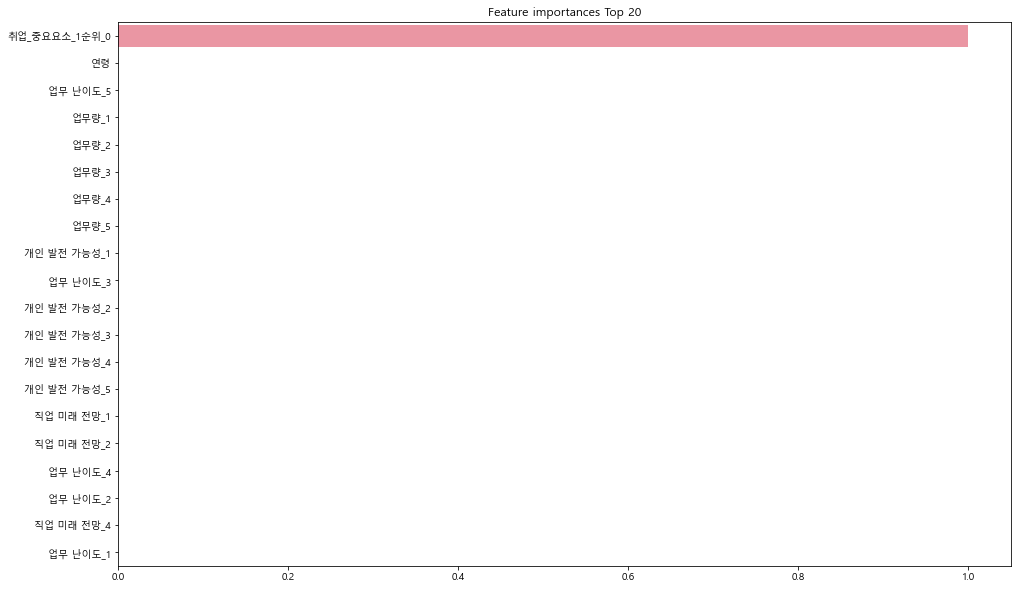

In [150]:
plot_importances(xgb_best)